# T1.2 Variables continuas y regla de Bayes

# Índice

1. Variables continuas
2. Teorema de Bayes en el caso continuo
3. La regla de decisión de Bayes
4. Clasificadores generativos y discriminativos

# 1 Variables continuas

**Función de densidad de probabilidad:** $\;$ caracterización usual de las variables continuas para la representación de conocimiento probabilístico
$$p(x)\geq 0 \quad \text{para todo $x$} \qquad \text{y} \qquad \int p(x)\,dx = 1$$

**La densidad normal:** $\;p(x)\sim\mathcal{N}(\mu, \sigma^2)$
$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\,\sigma^2}\,\right)\qquad%
P(x\in[\mu\pm 1.96\sigma])=0.95$$

**Ejemplo:** $\;$ densidades normales con $\,\mu=0\,$ y $\,\sigma^2=0.5, 1, 2$

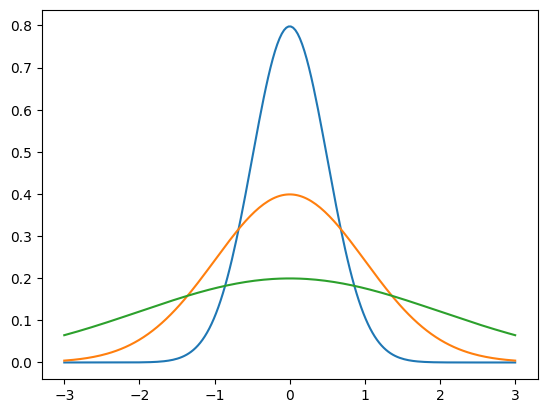

In [1]:
import numpy as np; from scipy.stats import norm; import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 200)
plt.plot(x, norm.pdf(x, 0, 0.5), x, norm.pdf(x, 0, 1), x, norm.pdf(x, 0, 2));

# 2 Teorema de Bayes en el caso continuo

**Teorema de Bayes en el caso continuo:** $\;$ probabilidad de una hipótesis $\,y\,$ después de observar una evidencia (nueva) $x$
$$P(y\mid x) = P(y)\,\frac{p(x\mid y)}{p(x)}$$

**Ejemplo:** $\;x=\,$ resultado de un test de saliva para el diagnóstico de caries
* Sin caries, $\,c=0,\,p(x\mid c=0)\sim\mathcal{N}(\mu=0, \sigma^2=1)$
* Con caries, $\,c=0,\,p(x\mid c=1)\sim\mathcal{N}(\mu=2, \sigma^2=0.5)$
* Sabemos que la probabilidad (a priori) de caries es: $\,P(c=1)=0.34$
* **Si el test da $x=2$, cuál es la probabilidad (a posteriori) de caries?**
$$P(c=1\mid x=2) = P(c=1)\,\dfrac{p(x=2\mid c=1)}{p(x=2)} = 0.340\,\dfrac{0.798}{0.307} = 0.884$$
* Observa que primero había que encontrar la (densidad de) probabilidad (a priori) de test $x=2$:
$$\begin{align*}
p(x=2)&=P(c=0)p(x=2\mid c=0)+P(c=1)p(x=2\mid c=1)\\
&=(1-0.34)\cdot 0.054+0.34\cdot 0.798=0.307
\end{align*}$$

In [2]:
Pc1 = 0.34; px2Dc0 = norm.pdf(2, 0, 1); px2Dc1 = norm.pdf(2, 2, 0.5)
px2 = (1-Pc1) * px2Dc0 + Pc1 * px2Dc1; Pc1Dx2 = Pc1 * px2Dc1 / px2
print(f"px2Dc0 = {px2Dc0:.3f}  px2Dc1 = {px2Dc1:.3f}  px2 = {px2:.3f}  Pc1Dx2 = {Pc1Dx2:.3f}")

px2Dc0 = 0.054  px2Dc1 = 0.798  px2 = 0.307  Pc1Dx2 = 0.884


# 3 La regla de decisión de Bayes

**Regla de decisión de Bayes:** $\;$ predice una hipótesis después de observar una evidencia $\,x\,$ mediante la elección, entre un conjunto de hipótesis posibles $\,\mathcal{C},\,$ de una hipótesis de máxima **probabilidad a posteriori** (de la observación de la evidencia)
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)$$

**Probabilidad de error:** $\;$ es decir, probabilidad de que la hipótesis predicha sea distinta de la realmente producida
$$P(\text{error}\mid x)=1-P(c^*(x)\mid x)$$

**Optimalidad de la regla de Bayes:** $\;$ ninguna otra elección mejoraría esta probabilidad de error!

**Ejemplo del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0\mid x=2) = 0.116\\ %
P(c=1\mid x=2) = 0.884\end{array}\right)=1$$

**Regla de Bayes en función de probabilidades a priori y (densidades) condicionales de las clases:** $\;$ en lugar (de arg-)maximizar $\,P(c\mid x)\,$ en $c$, lo hacemos en función de $\,P(c)\,p(x\mid c)$ puesto que el resultado es el mismo
$$\begin{align*}
c^*(x) &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)\\
&= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,\frac{p(x\mid c)}{p(x)}\\
&= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)
\end{align*}$$

**Ejemplo del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0)\,p(x=2\mid c=0) = 0.036\\ %
P(c=1)\,p(x=2\mid c=1) = 0.271
\end{array}\right)=1$$

# 4 Clasificadores generativos y discriminativos

**Regla de Bayes en clasificación:** $\;$ las hipótesis son las clases y la evidencia $x$ es un objeto que clasificamos con mínima probabilidad de error
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; p(x, c) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)$$

**Clasificadores generativos:** $\;$ clasifican a partir de priors y densidades condicionales (estimadas)

**Clasificadores discriminativos:** $\;$ clasifican a partir de las posteriors (estimadas) directamente

**Comparación básica entre generativos y discriminativos:**
* **Preproceso de características:** $\;$ más flexibles los discriminativos porque, a diferencia de los generativos, no requieren modelar densidades de probabilidad sobre el espacio de representación de los datos
* **Dificultad del aprendizaje:** $\;$ más fácil en el caso de los generativos, usualmente con cuentas y medianas
* **Precisión predictiva:** $\;$ mejor los discriminativos puesto que modelar $\,P(c\mid x)\,$ directamente suele ser más fácil que hacerlo por medio de las condicionales de las clases
* **Tratamiento de nuevas clases:** $\;$ más sencillo en el caso de los generativos porque permiten añadir clases nuevas a un problema sin re-entrenar las condicionales de las clases anteriores